<a href="https://colab.research.google.com/github/shilpashreshta/Data_Science_projects/blob/Employee_Attribution_Prediction/Employee_Attrition_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### EMPLOYEE ATTRITION PREDICTION

In [ ]:
# Import Python Lybraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Loading the Employee attrition data
from google.colab import files
files.upload()

##Understanding the data

In [ ]:
#Read the file into a dataframe
df= pd.read_csv(r'Employee-Attrition.csv')
df.head()

In [ ]:
#all columns not visible above, so ...
pd.set_option('display.max_columns',None)

In [ ]:
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [ ]:
#shape of data
df.shape

In [ ]:
#check if any columns have null values
df.isnull().any()

In [ ]:
#check if any column has single value entirely
uniq_val= {col: df[col].unique() for col in df.columns}
for col,values in uniq_val.items():
    print(f"{col},: ,{values}")

In [ ]:
#Drop the columns having single values entirely: EmployeeCount, StandardHours, Over18
df1=df.drop(['EmployeeCount', 'StandardHours', 'Over18'],axis=1)

In [ ]:
#check for na values
df1.isna().sum()

In [ ]:
#check for null values
df1.isnull().sum()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [ ]:
#check for statistical details
df1.describe()

In [ ]:
#check for datatypes
df1.select_dtypes(include='object')
#df1.select_dtypes(include='object').columns

In [ ]:
#check and drop duplicates if any
df1.drop_duplicates(inplace=True)

In [ ]:
#check if the data is balanced
df['Attrition'].value_counts()

<Axes: xlabel='count', ylabel='Attrition'>

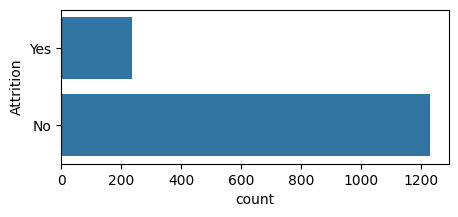

In [ ]:
#viewing the imbalance in the data
plt.figure(figsize=(5,2))
sns.countplot(y='Attrition',data=df1)

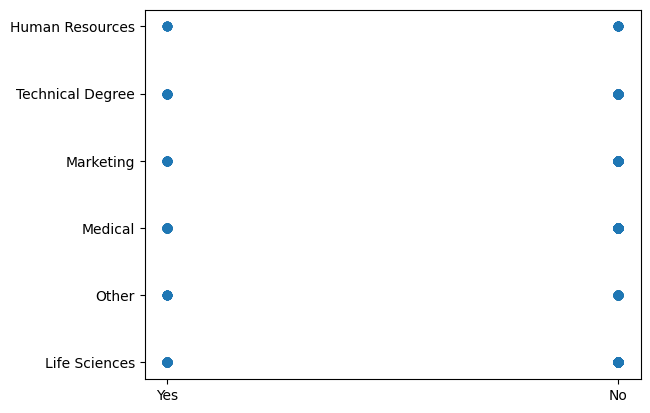

In [ ]:
plt.scatter(df1.Attrition,df1.EducationField)

In [ ]:
plt.scatter()